**bold text**#Trabalho de Modelagem de Dados - PUC RIO

#### Aluno: [Lucas Valiate](https://github.com/lucasvaliate)
#### Aluno: [Paula Felippe](https://github.com/paulacfelippe)
#### Aluno: [Thiago Lima](https://github.com/thgblima)
#### Orientadora: [Manoela Kohler](https://github.com/manoelakohler).

## Carregar base de Dados

In [ ]:
# Importação dos pacotes
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import class_weight
from sklearn.feature_selection import RFECV
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


In [ ]:
dataoriginal = pd.read_excel('basetccfinal.xlsx')
dataoriginal.head()


,Index,Business Unit Cd,Business Unit Desc,CNPJ / CPF,Cod Comprador Contrato,Cod Comprador Ped Atual,Cod Condição Pagamento,Cod Familia Item,Cod Filial / Fábrica,Cod Item,...,preco_std,preco_min,preco_std_br,preco_mediana_br,preco_min_all,cons_preco,economia_media,economia_min,custo_medio_br,Generico
0,0,-1,NAO SE APLICA,40174724,-2,-2,R87,MES,RBA466,40177692,...,0.0,37.035313,15.599544,36.727587,37.035313,0,0.013725,0.027451,216.808773,N
1,1,-1,NAO SE APLICA,40174724,-2,-2,R87,MES,RBA466,40177693,...,0.0,260.307600,162.887908,695.056000,260.307600,0,0.000000,0.000000,216.133185,N
2,2,-1,NAO SE APLICA,40174724,-2,-2,R87,MES,RBA466,40177694,...,0.0,193.848000,294.594737,193.848000,193.848000,0,0.000000,0.000000,216.328192,N
3,3,-1,NAO SE APLICA,45013796,-2,-2,R86,WTF,RBA466,40015463,...,0.0,417.132000,167.328014,625.950000,417.132000,0,0.000000,0.000000,10.894648,N
4,4,-1,NAO SE APLICA,45013796,-2,-2,R86,WTF,RBA466,40015465,...,0.0,106.087444,8.246118,106.087444,106.087444,0,0.000000,0.007942,10.929289,N


# Análise Exploratória

In [ ]:
dataoriginal.shape

(65596, 55)

In [ ]:
dataoriginal.describe()

,Index,Cod Comprador Contrato,Cod Comprador Ped Atual,Cod Item,Cod JDE Fornecedor,Mes Emissão NF,Mes Fechamento NF,Mês Criação Pedido,Num Ped Original,Total Impostos (ICMS e FCP),...,preco_medio,preco_std,preco_min,preco_std_br,preco_mediana_br,preco_min_all,cons_preco,economia_media,economia_min,custo_medio_br
count,65596.000000,6.559600e+04,6.559600e+04,6.559600e+04,6.559600e+04,65596.000000,65596.000000,65596.000000,6.559600e+04,6.559600e+04,...,6.559600e+04,65596.000000,6.559600e+04,65596.000000,6.559600e+04,6.559600e+04,65596.000000,65596.000000,6.559600e+04,3.460100e+04
mean,33872.021876,9.523521e+06,5.140027e+07,3.943951e+07,4.843123e+07,202181.717361,202185.152875,203938.774697,4.187794e+07,1.487381e+03,...,1.204675e+03,41.466893,1.170542e+03,359.884461,1.172264e+03,1.128225e+03,0.204525,41.583530,1.212431e+02,2.386664e+03
std,19539.326746,2.044966e+07,7.301907e+06,4.333439e+06,8.321962e+06,41.450786,38.148948,37469.288611,1.206419e+06,1.996251e+04,...,4.062335e+04,2005.899359,4.049821e+04,5030.396402,4.078408e+04,4.025275e+04,0.646333,1676.439494,6.436557e+03,5.887199e+04
min,0.000000,-2.000000e+00,-2.000000e+00,1.000052e+07,2.046000e+03,201709.000000,202101.000000,201711.000000,4.001491e+07,0.000000e+00,...,7.900000e-03,0.000000,7.900000e-03,0.000000,5.000000e-02,7.900000e-03,0.000000,0.000000,0.000000e+00,3.780000e-02
25%,16854.750000,-1.000000e+00,4.681613e+07,4.001841e+07,4.001732e+07,202201.000000,202201.000000,202112.000000,4.035214e+07,0.000000e+00,...,7.000000e+00,0.000000,6.250000e+00,1.608668,7.685776e+00,5.554867e+00,0.000000,0.000000,0.000000e+00,6.650000e+00
50%,33875.500000,-1.000000e+00,5.162118e+07,4.005622e+07,4.843846e+07,202203.000000,202203.000000,202202.000000,4.275673e+07,9.800000e-01,...,3.735000e+01,0.000000,3.355000e+01,20.771846,3.326400e+01,3.034000e+01,0.000000,0.000000,0.000000e+00,3.571167e+01
75%,50803.250000,-1.000000e+00,5.758141e+07,4.013243e+07,5.594172e+07,202205.000000,202205.000000,202204.000000,4.278281e+07,1.072925e+02,...,1.991905e+02,0.000000,1.807143e+02,150.122211,1.576700e+02,1.620000e+02,0.000000,0.000000,0.000000e+00,2.507008e+02
max,67589.000000,6.218833e+07,6.230625e+07,4.018844e+07,6.250135e+07,202206.000000,202206.000000,999999.000000,4.281252e+07,3.099635e+06,...,9.544800e+06,216813.665133,9.544800e+06,285026.200898,9.544800e+06,9.544800e+06,4.000000,214100.440575,1.046368e+06,9.536075e+06


In [ ]:
dataoriginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65596 entries, 0 to 65595
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Index                         65596 non-null  int64  
 1   Business Unit Cd              65596 non-null  object 
 2   Business Unit Desc            65596 non-null  object 
 3   CNPJ / CPF                    65596 non-null  object 
 4   Cod Comprador Contrato        65596 non-null  int64  
 5   Cod Comprador Ped Atual       65596 non-null  int64  
 6   Cod Condição Pagamento        65596 non-null  object 
 7   Cod Familia Item              65596 non-null  object 
 8   Cod Filial / Fábrica          65596 non-null  object 
 9   Cod Item                      65596 non-null  int64  
 10  Cod JDE Fornecedor            65596 non-null  int64  
 11  Depto Comprador Contrato      65596 non-null  object 
 12  Descrição Condição Pagamento  65596 non-null  object 
 13  D

In [ ]:
#Verificar a quantidade de colunas sem variabilidade
n = dataoriginal.nunique(axis=0)
print("No.of.unique values in each column :\n",
      n)

No.of.unique values in each column :
 Index                           65596
Business Unit Cd                 1004
Business Unit Desc                370
CNPJ / CPF                       3413
Cod Comprador Contrato             68
Cod Comprador Ped Atual           339
Cod Condição Pagamento             72
Cod Familia Item                  221
Cod Filial / Fábrica              128
Cod Item                        19037
Cod JDE Fornecedor               3428
Depto Comprador Contrato           11
Descrição Condição Pagamento       59
Dsc 1 Item                      17361
Dsc 2 Item                      13720
Dsc Familia Item                  221
Dsc Filial / Fábrica              125
Dsc Tipo Pedido                    11
Mes Emissão NF                     33
Mes Fechamento NF                  18
Mês Criação Pedido                 38
Nom Comprador Ped Atual           333
Nome Comprador Contrato            67
Nome Conta                        152
Nome Fornecedor                  3341
Num Ped Orig

In [ ]:
data=dataoriginal.copy()
#Retirar colunas que não eram relevantes para o modelo
data=data.drop(columns=['preco','Total Impostos (ICMS e FCP)','Index','Cod Familia Item','Dsc 1 Item','Business Unit Cd', 'Business Unit Desc','CNPJ / CPF','Cod Comprador Contrato','Cod Comprador Ped Atual','Cod Filial / Fábrica','Depto Comprador Contrato','Dsc 2 Item','Dsc Familia Item','Dsc Filial / Fábrica','Nom Comprador Ped Atual','Nom Comprador Ped Atual','Nome Comprador Contrato','Número Contrato','Servico (S/N)','Subconta','Unidade Medida Compra','Área Suprimentos Atual','Área Suprimentos Original','Área Suprimentos','dolarizar','Dsc Tipo Pedido','Descrição Condição Pagamento','Nome Conta','Tipo Conta','Mes Emissão NF','Mês Criação Pedido','Generico'])
#retirar coluna sem nome
data = dataoriginal.loc[:, ~data.columns.str.contains('^Unnamed')]

In [ ]:
data.head()

,Cod Condição Pagamento,Cod Item,Cod JDE Fornecedor,Mes Fechamento NF,Nome Fornecedor,Num Ped Original,Tipo Ped Original,Uf Fornecedor,custo_un,preco_total,...,preco_medio,preco_std,preco_min,preco_std_br,preco_mediana_br,preco_min_all,cons_preco,economia_media,economia_min,custo_medio_br
0,R87,40177692,40174724,202102,Respironics Inc,40014907,OI,PA,220.969231,28726.00,...,37.035313,0.0,37.035313,15.599544,36.727587,37.035313,0,0.013725,0.027451,216.808773
1,R87,40177693,40174724,202102,Respironics Inc,40014907,OI,PA,220.969278,39774.47,...,260.307600,0.0,260.307600,162.887908,695.056000,260.307600,0,0.000000,0.000000,216.133185
2,R87,40177694,40174724,202102,Respironics Inc,40014907,OI,PA,220.969111,9943.61,...,193.848000,0.0,193.848000,294.594737,193.848000,193.848000,0,0.000000,0.000000,216.328192
3,R86,40015463,45013796,202110,Gentec Shangai Corporation,40015232,OI,ZZ,10.876288,59895.72,...,417.132000,0.0,417.132000,167.328014,625.950000,417.132000,0,0.000000,0.000000,10.894648
4,R86,40015465,45013796,202105,Gentec Shangai Corporation,40015232,OI,ZZ,10.817167,25431.16,...,106.087444,0.0,106.087444,8.246118,106.087444,106.087444,0,0.000000,0.007942,10.929289


In [ ]:
data.shape


(65596, 23)

In [ ]:
#verificar os tipos de dados contidos na base
col = data.select_dtypes(exclude=['number']).columns.tolist()
for col in data.columns:
    unique_values = set(data[col].apply(type))
    print(col, unique_values)

Cod Condição Pagamento {<class 'str'>, <class 'int'>}
Cod Item {<class 'int'>}
Cod JDE Fornecedor {<class 'int'>}
Mes Fechamento NF {<class 'int'>}
Nome Fornecedor {<class 'str'>}
Num Ped Original {<class 'int'>}
Tipo Ped Original {<class 'str'>}
Uf Fornecedor {<class 'str'>, <class 'float'>}
custo_un {<class 'float'>}
preco_total {<class 'float'>}
quantidade {<class 'float'>}
data_fechamento {<class 'str'>}
dolar_valor {<class 'float'>}
preco_medio {<class 'float'>}
preco_std {<class 'float'>}
preco_min {<class 'float'>}
preco_std_br {<class 'float'>}
preco_mediana_br {<class 'float'>}
preco_min_all {<class 'float'>}
cons_preco {<class 'int'>}
economia_media {<class 'float'>}
economia_min {<class 'float'>}
custo_medio_br {<class 'float'>}


In [ ]:
# converter todas as colunas numéricas para float
num_cols = data.select_dtypes(include=[int, float]).columns
data.loc[:, num_cols] = data.loc[:, num_cols].astype('float').copy()

# converter todas as colunas de texto para string
text_cols = data.select_dtypes(include=object).columns
data.loc[:, text_cols] = data.loc[:, text_cols].astype('object').copy()

<ipython-input-12-0350035a6b8a>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data2.loc[:, num_cols] = data2.loc[:, num_cols].astype('float').copy()


In [ ]:
#Confirmar se as alterações nos tipos foi executada
for col in data.columns:
    unique_values = set(data[col].apply(type))
    print(col, unique_values)

Cod Condição Pagamento {<class 'str'>, <class 'int'>}
Cod Item {<class 'float'>}
Cod JDE Fornecedor {<class 'float'>}
Mes Fechamento NF {<class 'float'>}
Nome Fornecedor {<class 'str'>}
Num Ped Original {<class 'float'>}
Tipo Ped Original {<class 'str'>}
Uf Fornecedor {<class 'str'>, <class 'float'>}
custo_un {<class 'float'>}
preco_total {<class 'float'>}
quantidade {<class 'float'>}
data_fechamento {<class 'str'>}
dolar_valor {<class 'float'>}
preco_medio {<class 'float'>}
preco_std {<class 'float'>}
preco_min {<class 'float'>}
preco_std_br {<class 'float'>}
preco_mediana_br {<class 'float'>}
preco_min_all {<class 'float'>}
cons_preco {<class 'float'>}
economia_media {<class 'float'>}
economia_min {<class 'float'>}
custo_medio_br {<class 'float'>}


In [ ]:
# Identificar as colunas datetime64
cols_datetime = data.select_dtypes(include=['datetime64']).columns.tolist()

# Imprimir as colunas identificadas
print(cols_datetime)

[]


# Transformação de variáveis categórias em númericas usando LabelEncoder

In [ ]:
data['data_fechamento'] = pd.to_datetime(data['data_fechamento'])

In [ ]:
data['data_fechamento'].head()

0   2021-02-01
1   2021-02-01
2   2021-02-01
3   2021-10-01
4   2021-05-01
Name: data_fechamento, dtype: datetime64[ns]

In [ ]:
from sklearn.preprocessing import LabelEncoder
from joblib import dump, load

# Separar as variáveis numéricas das categóricas
Colunas_num = data.select_dtypes(include=['float', 'int']).columns.tolist()
X_numerical = data[Colunas_num]

# Criar um dicionário para armazenar os objetos LabelEncoder
label_encoders = {}
data_transf= pd.DataFrame()
colunas_obj = data.select_dtypes(include = "object").columns

# Iterar sobre as colunas categóricas do dataframe
for obj in colunas_obj:
    # Criar um novo objeto LabelEncoder
    le = LabelEncoder()
    # Aplicar o LabelEncoder na coluna categórica
    data_transf[obj] = le.fit_transform(data[obj].astype(str))
    # Salvar o objeto LabelEncoder em um arquivo
    dump(le, f'{obj}_label_encoder.joblib')
    # Armazenar o objeto LabelEncoder no dicionário
    label_encoders[obj] = le

# Converter a coluna datetime64 para segundos desde o Unix Epoch
unix_time = data['data_fechamento'].min()
X_date = (data['data_fechamento'] - unix_time).dt.total_seconds()

# Criação do novo dataframe
data_tratado = pd.concat([X_numerical, data_transf, X_date], axis=1)
data_tratado.head()


,Cod Item,Cod JDE Fornecedor,Mes Fechamento NF,Num Ped Original,custo_un,preco_total,quantidade,dolar_valor,preco_medio,preco_std,...,preco_min_all,cons_preco,economia_media,economia_min,custo_medio_br,Cod Condição Pagamento,Nome Fornecedor,Tipo Ped Original,Uf Fornecedor,data_fechamento
0,40177692.0,40174724.0,202102.0,40014907.0,220.969231,28726.00,130.0,5.42,37.035313,0.0,...,37.035313,0.0,0.013725,0.027451,216.808773,52,2656,4,23,2678400.0
1,40177693.0,40174724.0,202102.0,40014907.0,220.969278,39774.47,180.0,5.42,260.307600,0.0,...,260.307600,0.0,0.000000,0.000000,216.133185,52,2656,4,23,2678400.0
2,40177694.0,40174724.0,202102.0,40014907.0,220.969111,9943.61,45.0,5.42,193.848000,0.0,...,193.848000,0.0,0.000000,0.000000,216.328192,52,2656,4,23,2678400.0
3,40015463.0,45013796.0,202110.0,40015232.0,10.876288,59895.72,5507.0,5.53,417.132000,0.0,...,417.132000,0.0,0.000000,0.000000,10.894648,51,1284,4,39,23587200.0
4,40015465.0,45013796.0,202105.0,40015232.0,10.817167,25431.16,2351.0,5.29,106.087444,0.0,...,106.087444,0.0,0.000000,0.007942,10.929289,51,1284,4,39,10368000.0


In [ ]:
for col in df_tratado.columns:
    unique_values = set(data_tratado[col].apply(type))
    print(col, unique_values)

Cod Item {<class 'float'>}
Cod JDE Fornecedor {<class 'float'>}
Mes Fechamento NF {<class 'float'>}
Num Ped Original {<class 'float'>}
custo_un {<class 'float'>}
preco_total {<class 'float'>}
quantidade {<class 'float'>}
dolar_valor {<class 'float'>}
preco_medio {<class 'float'>}
preco_std {<class 'float'>}
preco_min {<class 'float'>}
preco_std_br {<class 'float'>}
preco_mediana_br {<class 'float'>}
preco_min_all {<class 'float'>}
cons_preco {<class 'float'>}
economia_media {<class 'float'>}
economia_min {<class 'float'>}
custo_medio_br {<class 'float'>}
Cod Condição Pagamento {<class 'int'>}
Nome Fornecedor {<class 'int'>}
Tipo Ped Original {<class 'int'>}
Uf Fornecedor {<class 'int'>}
data_fechamento {<class 'float'>}


# Tratar missing values


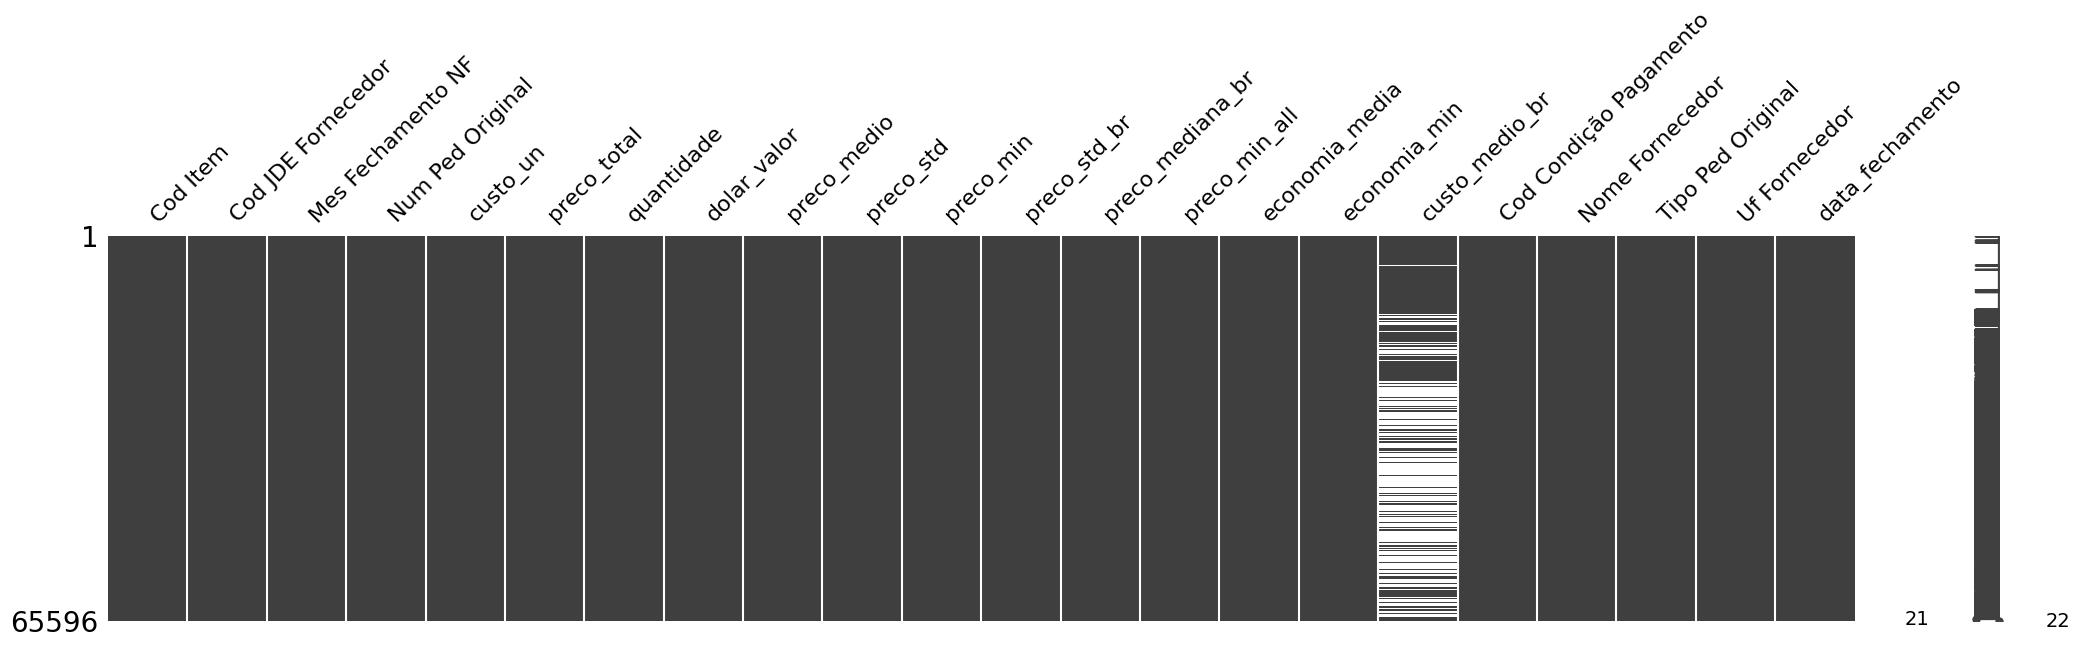

In [ ]:
import missingno as msno
X = data_tratado.drop('cons_preco', axis=1)
msno.matrix(X, figsize=(25,5));

In [ ]:
print(data_tratado.isna().sum())

Cod Item                      0
Cod JDE Fornecedor            0
Mes Fechamento NF             0
Num Ped Original              0
custo_un                      0
preco_total                   0
quantidade                    0
dolar_valor                   0
preco_medio                   0
preco_std                     0
preco_min                     0
preco_std_br                  0
preco_mediana_br              0
preco_min_all                 0
cons_preco                    0
economia_media                0
economia_min                  0
custo_medio_br            30995
Cod Condição Pagamento        0
Nome Fornecedor               0
Tipo Ped Original             0
Uf Fornecedor                 0
data_fechamento               0
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer

# Criar um objeto SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
X=data_tratado
# Aplicar o imputador aos dados de entrada
X_tratado = imputer.fit_transform(X)
data_sem_missing = pd.DataFrame(X_tratado, columns=df_tratado.columns)

In [ ]:
print(data_sem_missing.isna().sum())

Cod Item                  0
Cod JDE Fornecedor        0
Mes Fechamento NF         0
Num Ped Original          0
custo_un                  0
preco_total               0
quantidade                0
dolar_valor               0
preco_medio               0
preco_std                 0
preco_min                 0
preco_std_br              0
preco_mediana_br          0
preco_min_all             0
cons_preco                0
economia_media            0
economia_min              0
custo_medio_br            0
Cod Condição Pagamento    0
Nome Fornecedor           0
Tipo Ped Original         0
Uf Fornecedor             0
data_fechamento           0
dtype: int64


In [ ]:
data_sem_missing.head()

,Cod Item,Cod JDE Fornecedor,Mes Fechamento NF,Num Ped Original,custo_un,preco_total,quantidade,dolar_valor,preco_medio,preco_std,...,preco_min_all,cons_preco,economia_media,economia_min,custo_medio_br,Cod Condição Pagamento,Nome Fornecedor,Tipo Ped Original,Uf Fornecedor,data_fechamento
0,40177692.0,40174724.0,202102.0,40014907.0,220.969231,28726.00,130.0,5.42,37.035313,0.0,...,37.035313,0.0,0.013725,0.027451,216.808773,52.0,2656.0,4.0,23.0,2678400.0
1,40177693.0,40174724.0,202102.0,40014907.0,220.969278,39774.47,180.0,5.42,260.307600,0.0,...,260.307600,0.0,0.000000,0.000000,216.133185,52.0,2656.0,4.0,23.0,2678400.0
2,40177694.0,40174724.0,202102.0,40014907.0,220.969111,9943.61,45.0,5.42,193.848000,0.0,...,193.848000,0.0,0.000000,0.000000,216.328192,52.0,2656.0,4.0,23.0,2678400.0
3,40015463.0,45013796.0,202110.0,40015232.0,10.876288,59895.72,5507.0,5.53,417.132000,0.0,...,417.132000,0.0,0.000000,0.000000,10.894648,51.0,1284.0,4.0,39.0,23587200.0
4,40015465.0,45013796.0,202105.0,40015232.0,10.817167,25431.16,2351.0,5.29,106.087444,0.0,...,106.087444,0.0,0.000000,0.007942,10.929289,51.0,1284.0,4.0,39.0,10368000.0


# Analisar distribuição dos dados


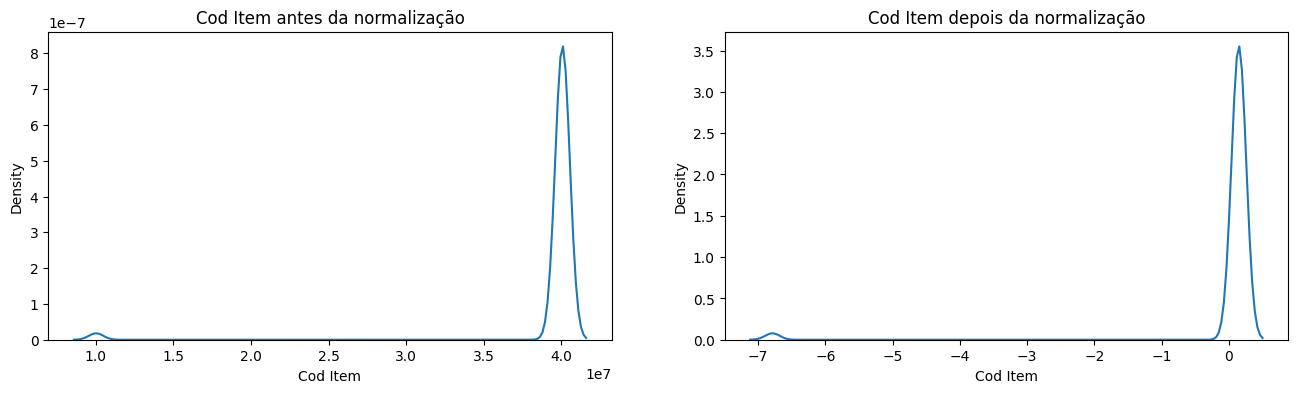

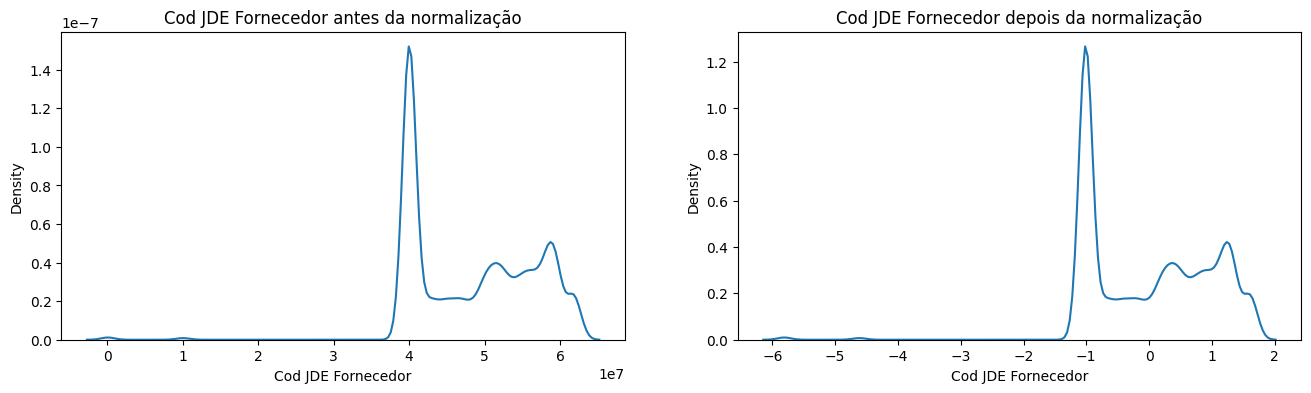

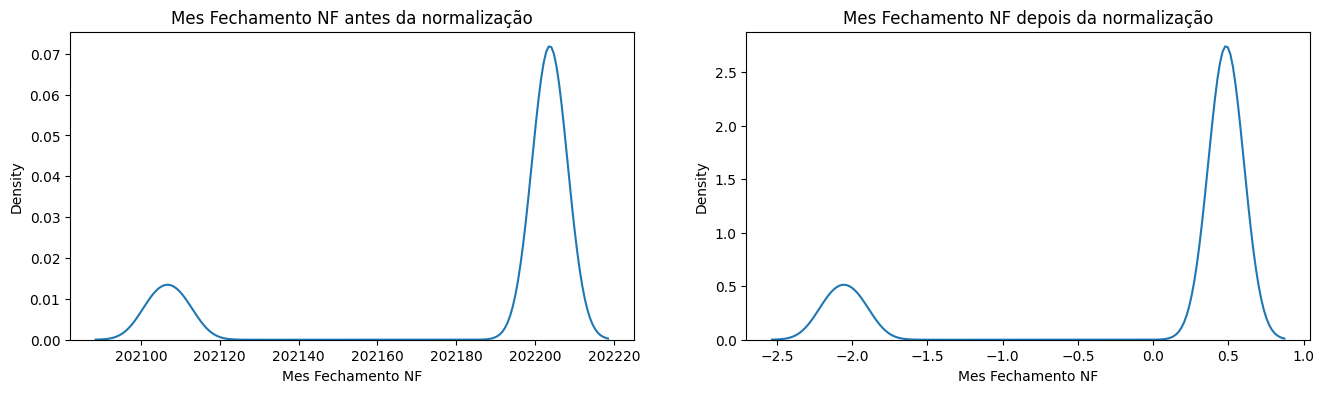

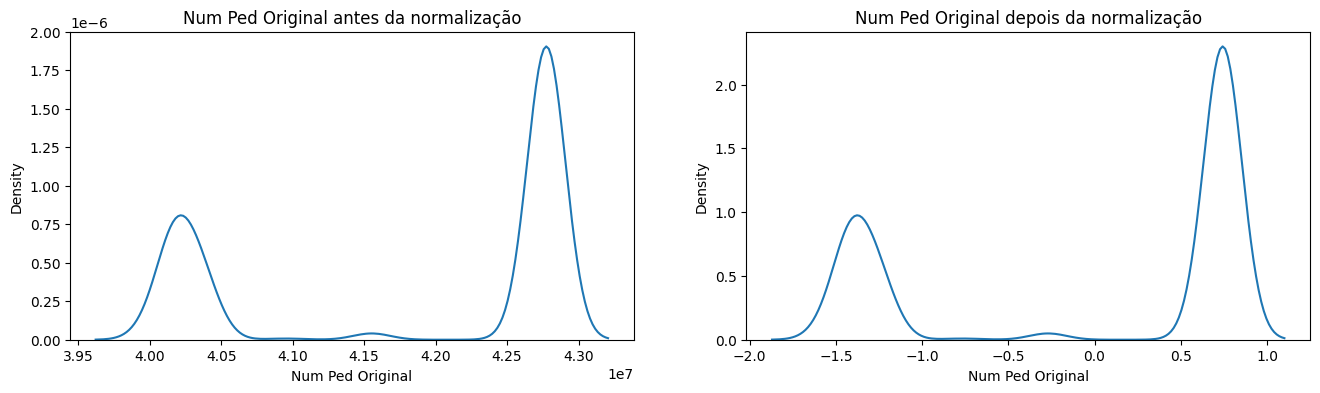

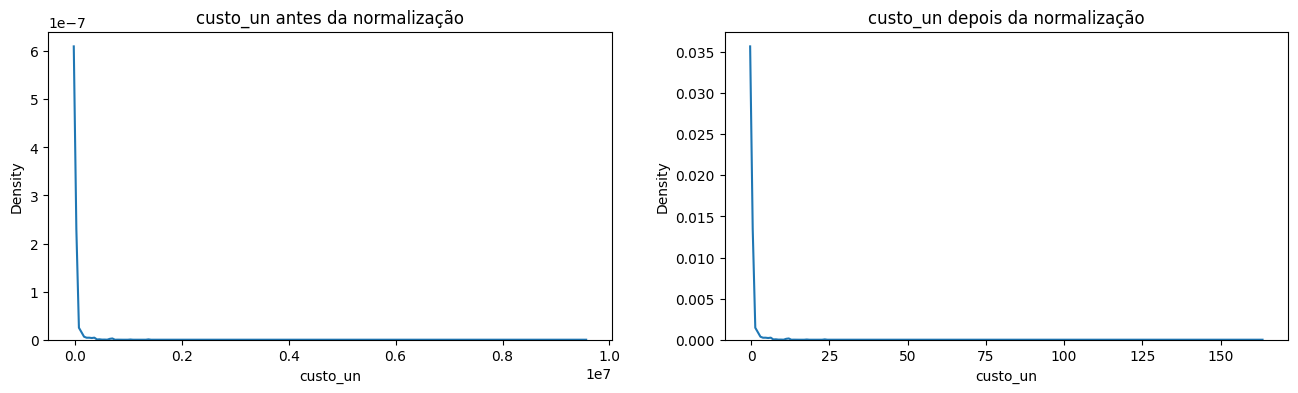

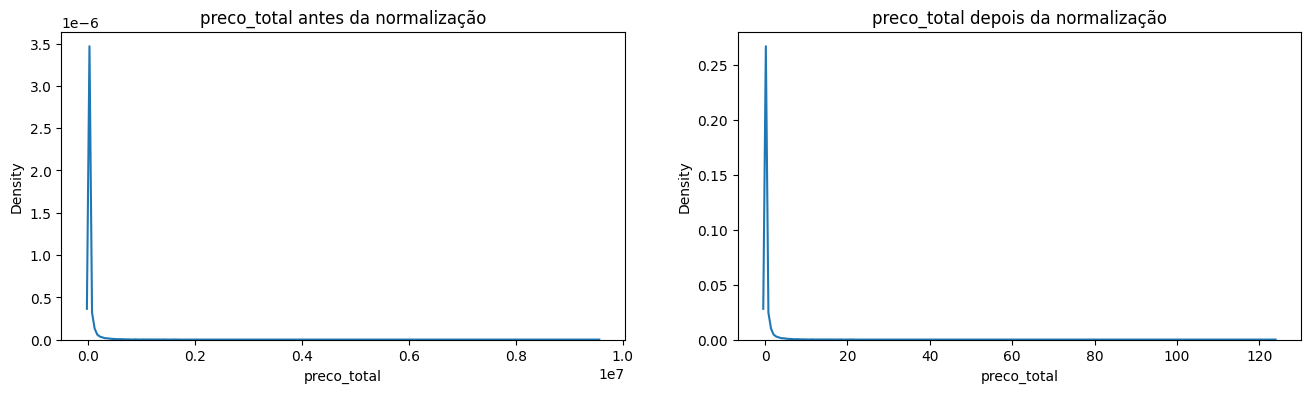

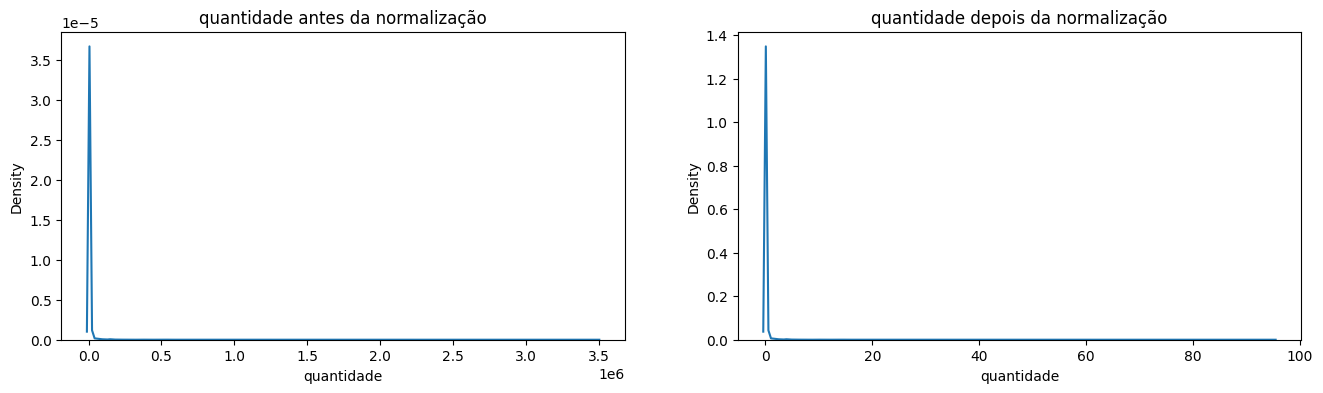

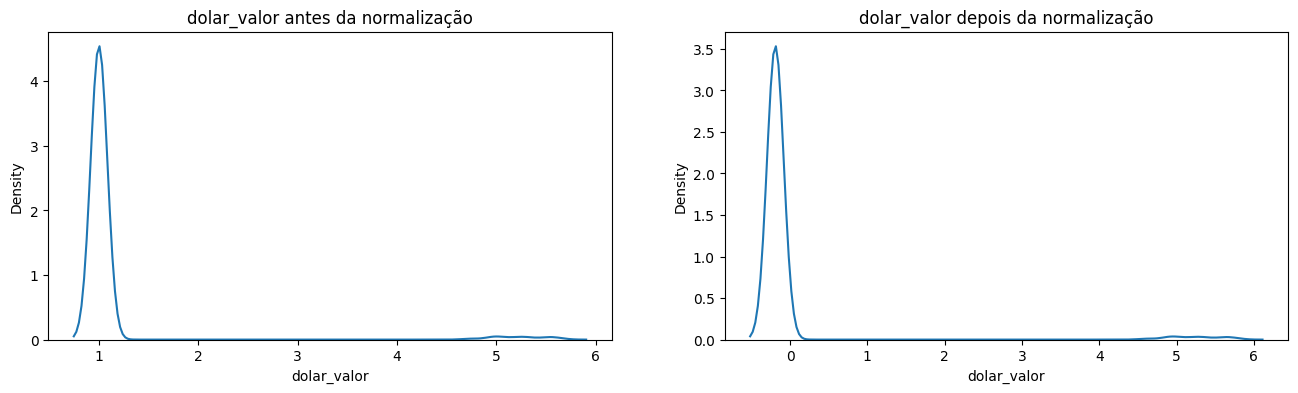

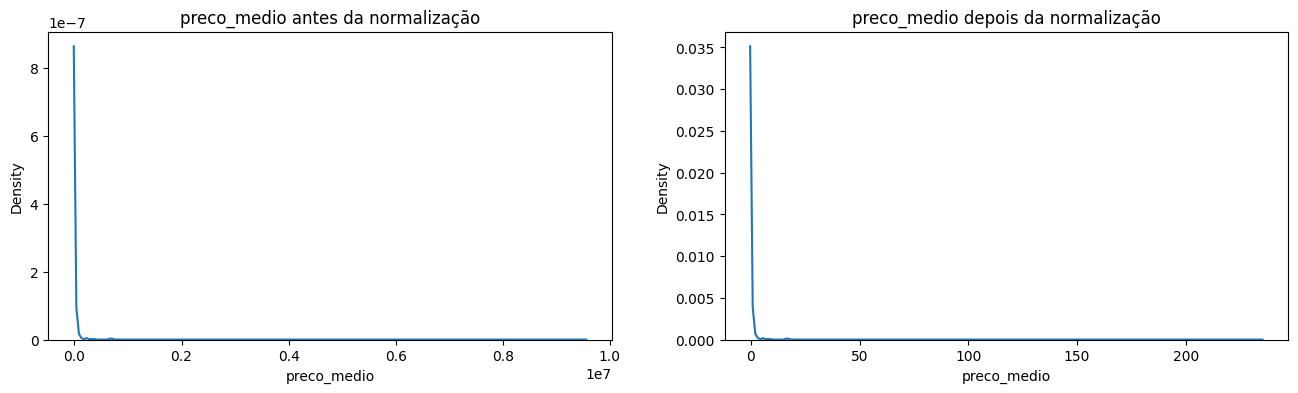

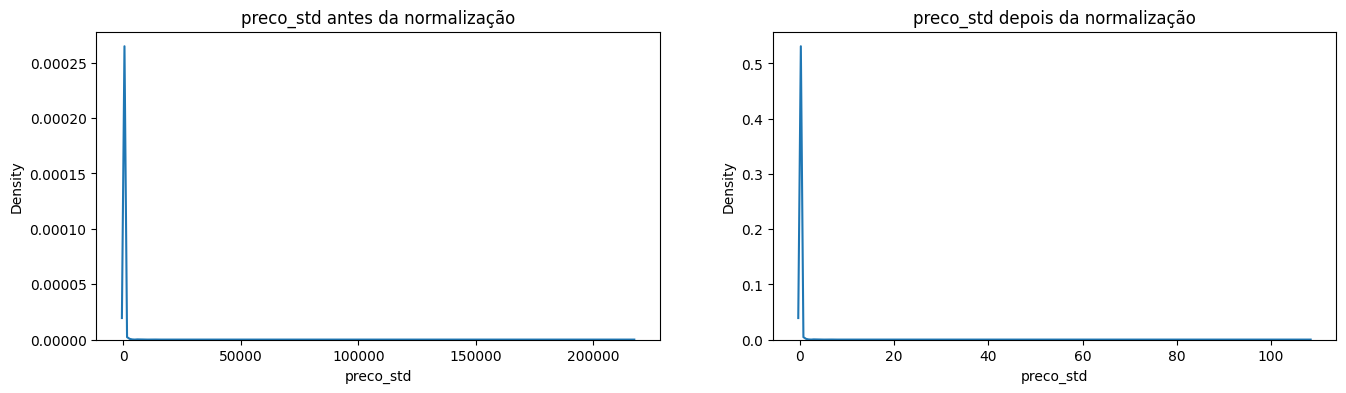

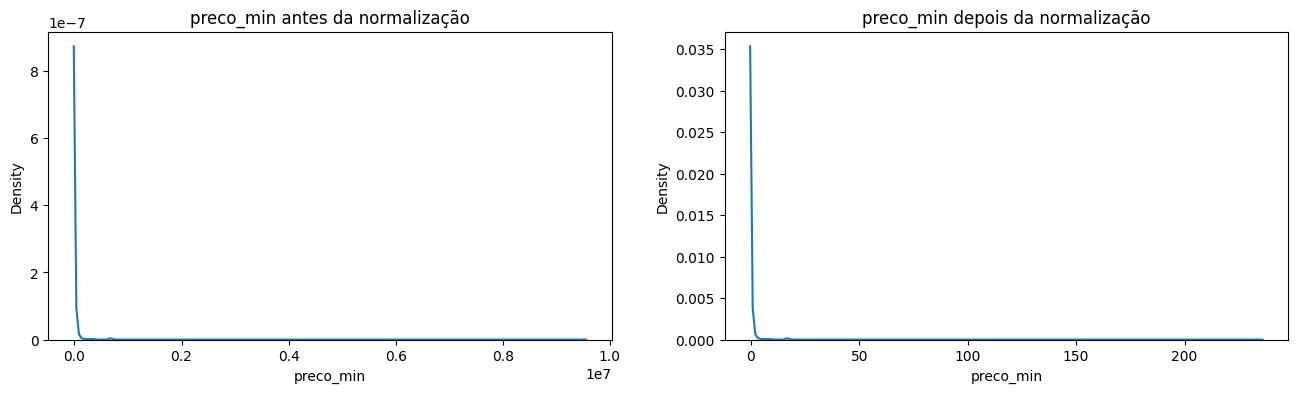

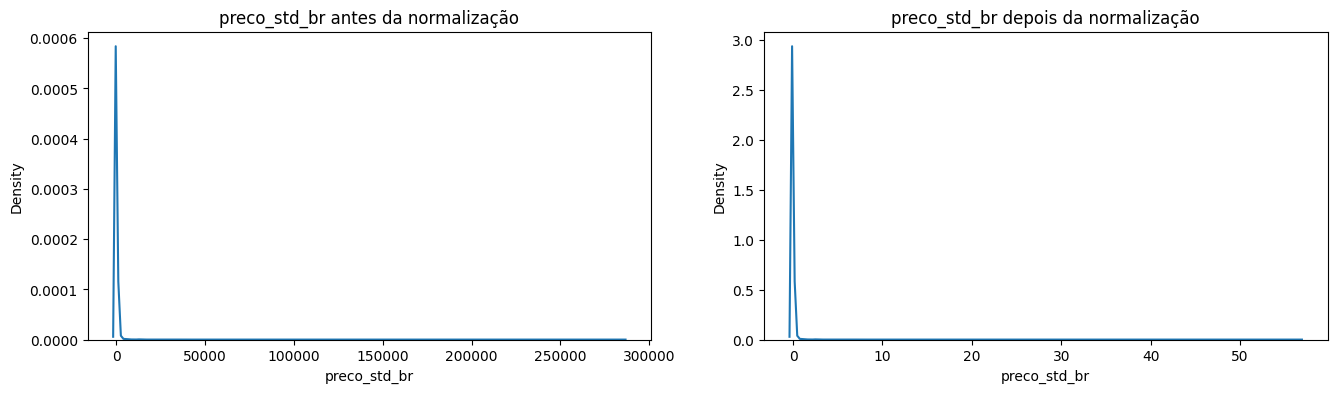

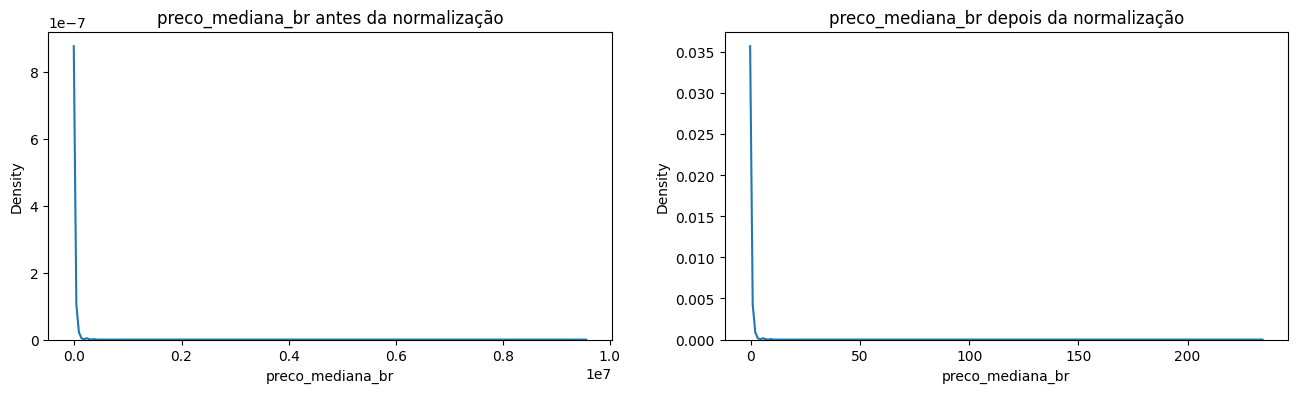

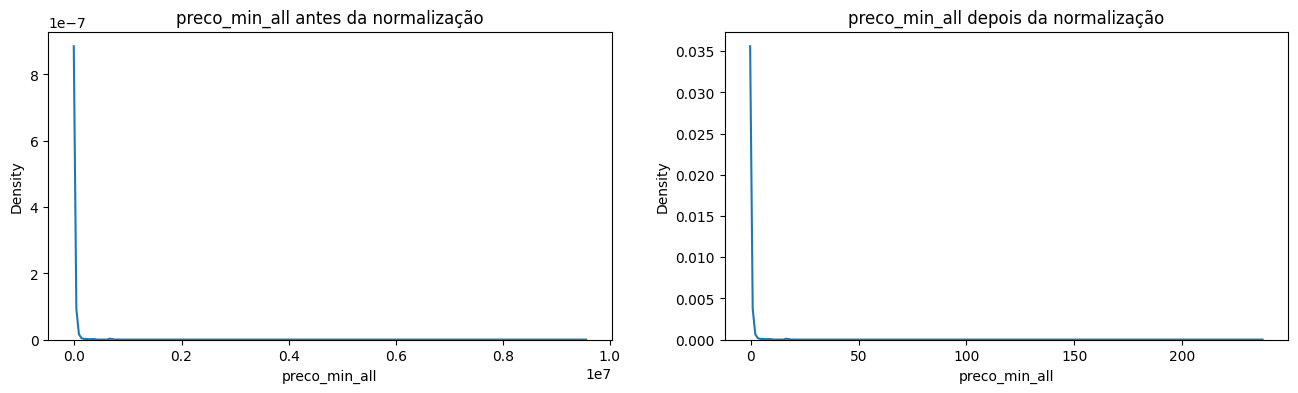

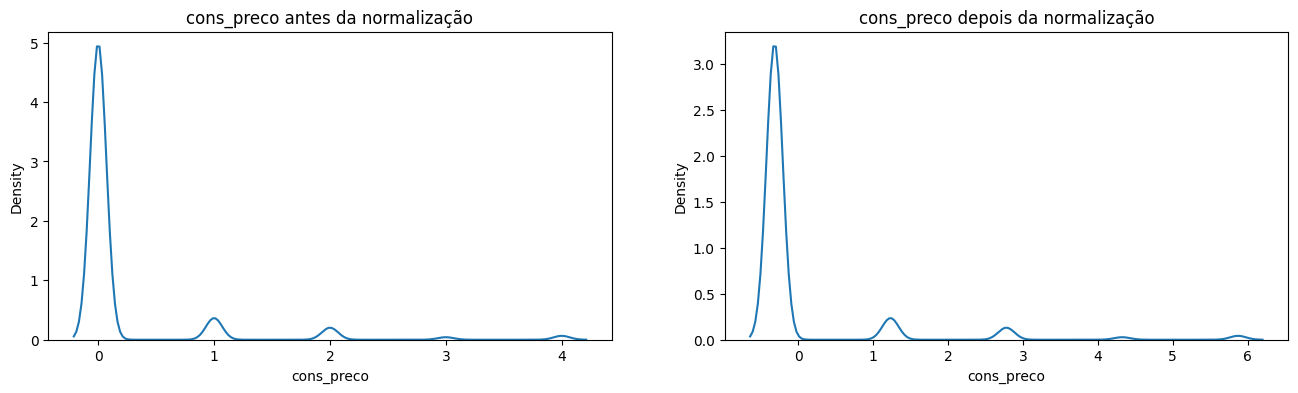

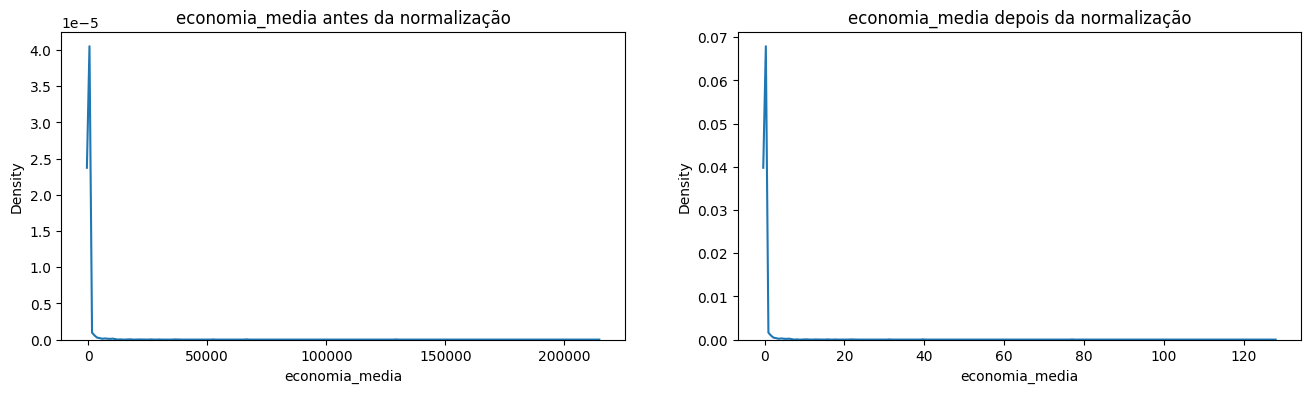

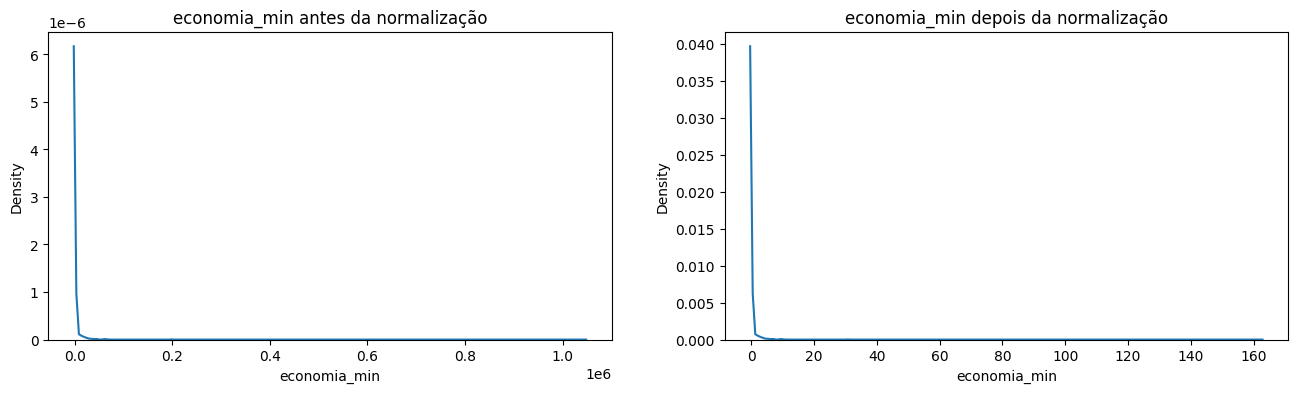

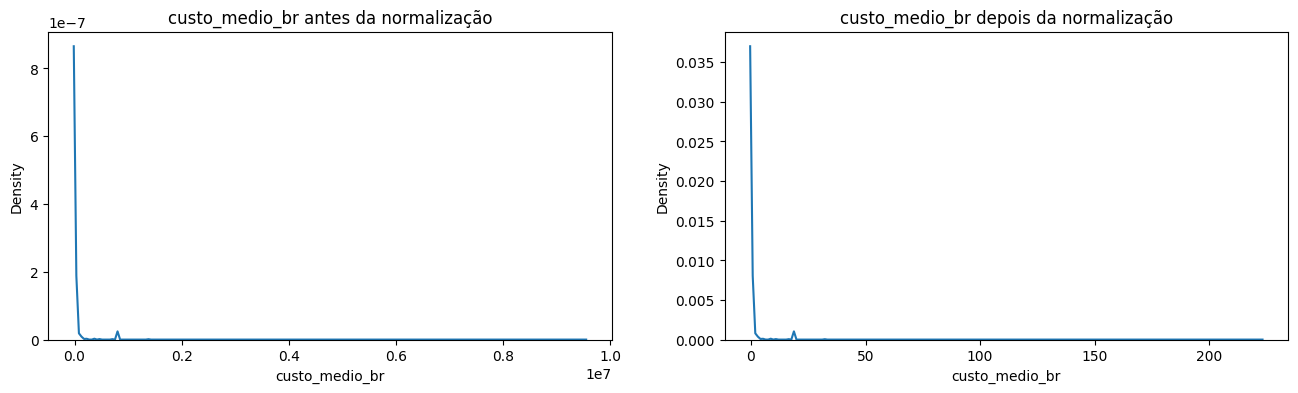

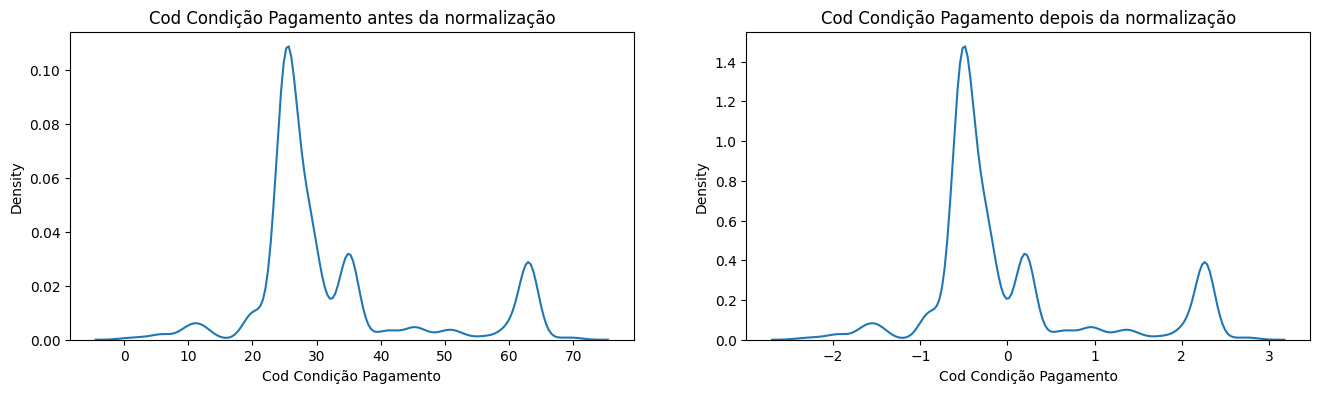

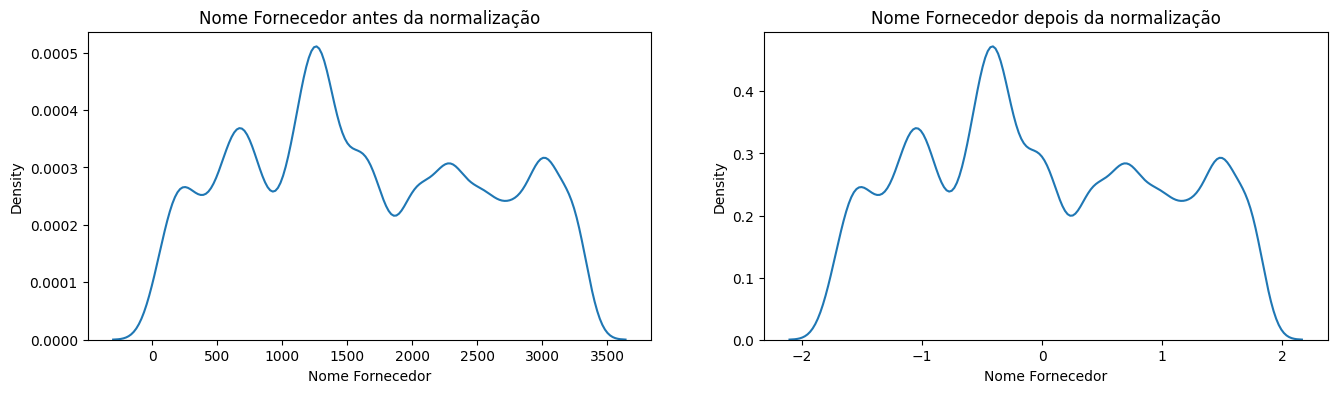

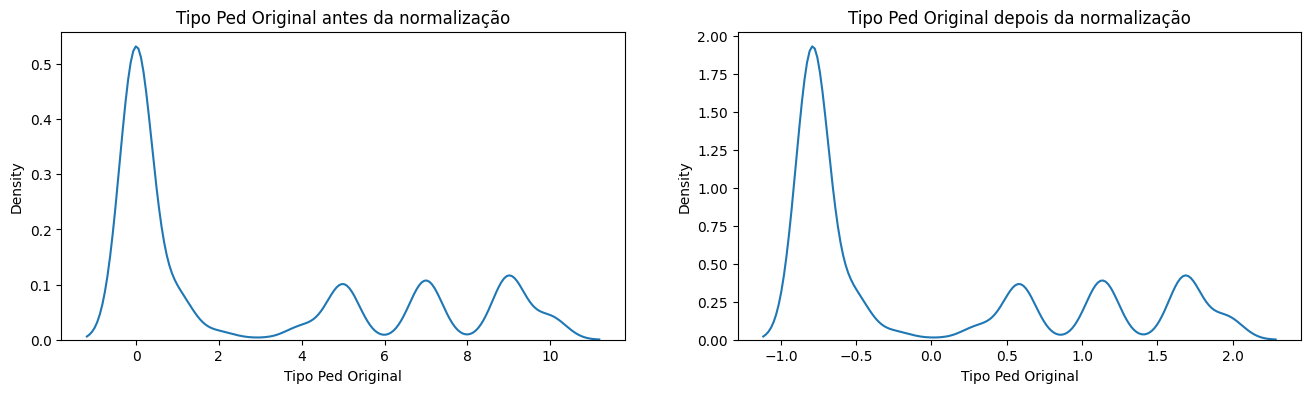

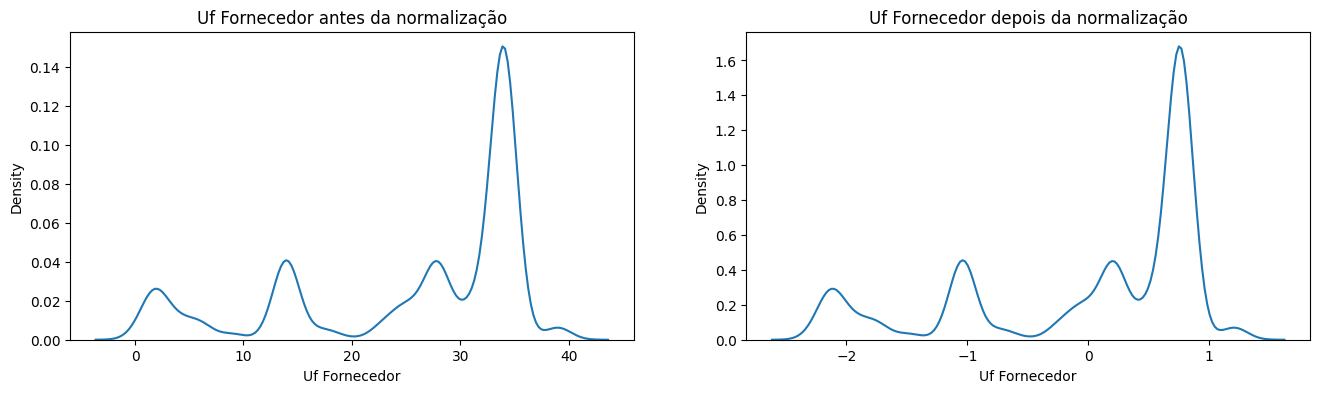

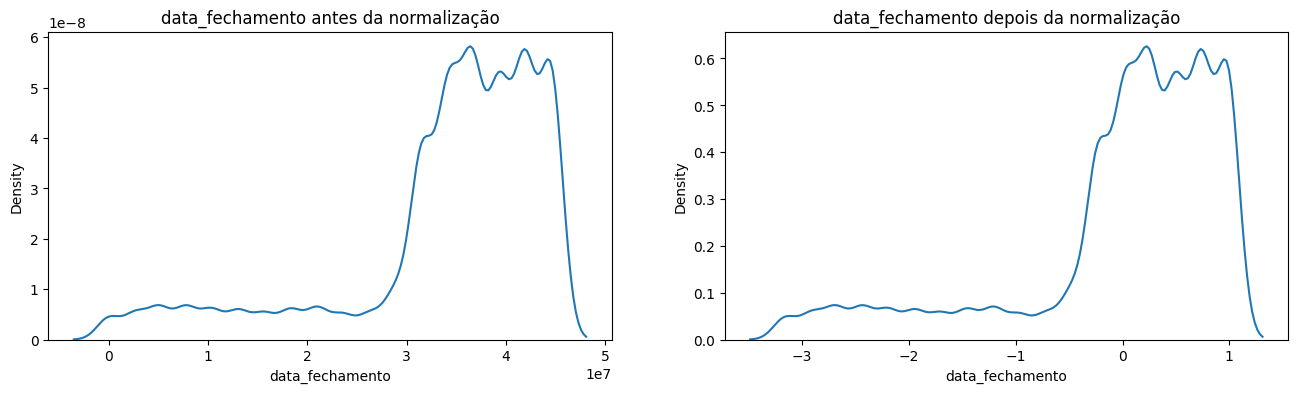

In [ ]:

# Seleciona as colunas numéricas
num_cols = data_sem_missing.select_dtypes(include=['float', 'int']).columns

# Plota as densidades de probabilidade antes e depois da normalização
for col in num_cols:
    fig, ax = plt.subplots(ncols=2, figsize=(16, 4))

    # Plot da densidade de probabilidade antes da normalização
    sns.kdeplot(data_sem_missing[col], ax=ax[0])
    ax[0].set_title(f"{col} antes da normalização")

    # Plot da densidade de probabilidade depois da normalização
    sns.kdeplot((data_sem_missing[col] - np.mean(data_sem_missing[col])) / np.std(data_sem_missing[col]), ax=ax[1])
    ax[1].set_title(f"{col} depois da normalização")

    plt.show()


# RFECV

In [ ]:

# Separar target e características
X = data_sem_missing.drop('cons_preco', axis=1)
y = data_sem_missing['cons_preco']

# Separar dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar modelo de classificação
rfc = RandomForestClassifier(n_estimators=100, max_depth=30, min_samples_leaf=1, min_samples_split=5, class_weight='balanced', random_state=42)

# Inicializar RFE com validação cruzada estratificada
rfecv = RFECV(estimator=rfc, step=1, cv=5, scoring='accuracy')

# Treinar RFE
rfecv.fit(X_train, y_train)

# Imprimir características selecionadas e ranking
selected_features = X_train.columns[rfecv.support_]
feature_ranking = pd.Series(rfecv.ranking_, index=X_train.columns).sort_values()
print("Características selecionadas ({0}): {1}\nRanking: {2}".format(len(selected_features), selected_features.tolist(), feature_ranking))

# Treinar novo modelo apenas com características selecionadas
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Treinar modelo com dados selecionados
rfc_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rfc_selected.fit(X_train_selected, y_train)

# Avaliar modelo
y_pred = rfc_selected.predict(X_test_selected)
print(classification_report(y_test, y_pred))


Características selecionadas (10): ['Num Ped Original', 'custo_un', 'preco_medio', 'preco_std', 'preco_min', 'preco_std_br', 'preco_mediana_br', 'preco_min_all', 'economia_media', 'economia_min']
Ranking: preco_min                  1
economia_min               1
economia_media             1
Num Ped Original           1
custo_un                   1
preco_min_all              1
preco_mediana_br           1
preco_medio                1
preco_std                  1
preco_std_br               1
preco_total                2
Cod Item                   3
Nome Fornecedor            4
quantidade                 5
custo_medio_br             6
Cod JDE Fornecedor         7
Uf Fornecedor              8
Cod Condição Pagamento     9
data_fechamento           10
Tipo Ped Original         11
Mes Fechamento NF         12
dolar_valor               13
dtype: int64
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     11503
         1.0       0.93      0.70  

In [ ]:
# criar um novo dataframe apenas com as características selecionadas e a variável de destino
data_RFE = data_sem_missing.loc[:, selected_features.tolist() + ['cons_preco']]

In [ ]:
for col in data_RFE.columns:
    unique_values = set(df_tratado[col].apply(type))
    print(col, unique_values)

Cod Item {<class 'float'>}
Cod JDE Fornecedor {<class 'float'>}
Mes Fechamento NF {<class 'float'>}
Num Ped Original {<class 'float'>}
custo_un {<class 'float'>}
preco_total {<class 'float'>}
quantidade {<class 'float'>}
dolar_valor {<class 'float'>}
preco_medio {<class 'float'>}
preco_std {<class 'float'>}
preco_min {<class 'float'>}
preco_std_br {<class 'float'>}
preco_mediana_br {<class 'float'>}
preco_min_all {<class 'float'>}
cons_preco {<class 'float'>}
economia_media {<class 'float'>}
economia_min {<class 'float'>}
custo_medio_br {<class 'float'>}
Cod Condição Pagamento {<class 'int'>}
Nome Fornecedor {<class 'int'>}
Tipo Ped Original {<class 'int'>}
Uf Fornecedor {<class 'int'>}
data_fechamento {<class 'float'>}


# Estrutura de análise de resultados

In [ ]:
def predict_and_evaluate(X_test, y_test, model, average='macro'):

  # inferência do teste
  y_pred = model.predict(X_test) 

  # Acurácia
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  # F1
  from sklearn.metrics import f1_score
  f1 = f1_score(y_test, y_pred, average=average)
  print('F1: ', f1)

  from sklearn.metrics import precision_score, recall_score, roc_auc_score

  # Precisão
  precision = precision_score(y_test, y_pred, average='macro')
  print('Precisão: ', precision)

  # Recall
  recall = recall_score(y_test, y_pred, average='macro')
  print('Recall: ', recall)

  # Matriz de confusão
  from sklearn.metrics import confusion_matrix

  # Gerando a matriz de confusão
  confMatrix = confusion_matrix(y_test, y_pred)

  # Normalizando a matriz de confusão
  row_sums = confMatrix.sum(axis=1, keepdims=True)
  norm_confMatrix = confMatrix / row_sums

  ax = plt.subplot()
  sns.heatmap(norm_confMatrix, annot=True, fmt=".2f", cmap='Blues')
  ax.set_xlabel('Previsto')
  ax.set_ylabel('Real')
  ax.set_title('Matriz de Confusão Normalizada')

  # Colocar os nomes
  ax.xaxis.set_ticklabels(['0', '1', '2', '3', '4']) 
  ax.yaxis.set_ticklabels(['0', '1', '2', '3', '4'])
  plt.show()

  # Retornar as métricas
  return accuracy, kappa, f1, norm_confMatrix


# Modelagem com Randomforest

**RFECV (Sem balanceamento)**

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     11503
         1.0       0.94      0.69      0.80       891
         2.0       0.92      0.98      0.95       461
         3.0       0.93      0.65      0.77        98
         4.0       0.96      0.66      0.78       167

    accuracy                           0.97     13120
   macro avg       0.94      0.80      0.86     13120
weighted avg       0.97      0.97      0.97     13120

Acurácia:  0.9688262195121952
Kappa:  0.8495520792554335
F1:  0.9688262195121952
Precisão:  0.9436860631700803
Recall:  0.7966813565216195


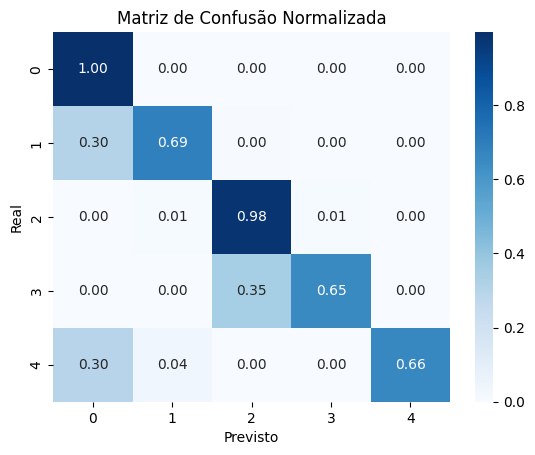

In [ ]:
# separar as características e o target
X = data_RFE.drop('cons_preco', axis=1)
y = data_RFE['cons_preco']

# dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# instanciar o modelo
model = RandomForestClassifier(n_estimators=100, max_depth=30, min_samples_leaf=1, min_samples_split=5, random_state=42)

# treinar o modelo
model.fit(X_train, y_train)

# fazer as previsões com o modelo treinado
y_pred = model.predict(X_test)

# avaliar o modelo
print(classification_report(y_test, y_pred))
average = 'micro'

accuracy, kappa, f1, confMatrix = predict_and_evaluate(X_test, y_test, model, average)


**RFECV + Oversampling**

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     11503
         1.0       0.90      0.74      0.81       891
         2.0       0.93      0.97      0.95       461
         3.0       0.89      0.69      0.78        98
         4.0       0.92      0.78      0.85       167

    accuracy                           0.97     13120
   macro avg       0.92      0.84      0.88     13120
weighted avg       0.97      0.97      0.97     13120

Acurácia:  0.9705792682926829
Kappa:  0.8621978039679735
F1:  0.9705792682926829
Precisão:  0.9244836308415925
Recall:  0.8366437905895185


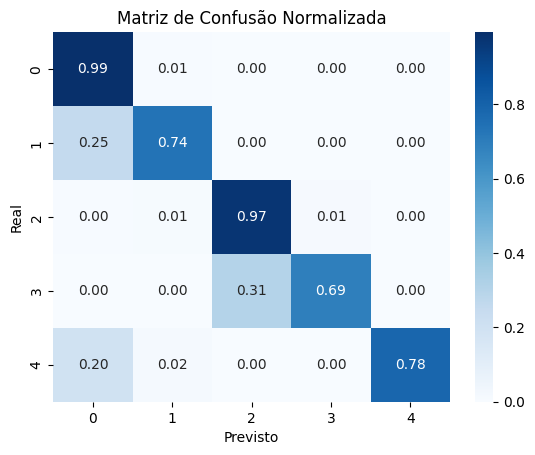

In [ ]:
# separar as características e o target
X = data_RFE.drop('cons_preco', axis=1)
y = data_RFE['cons_preco']

# dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# aplicar oversampling na classe minoritária
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# instanciar o modelo
model = RandomForestClassifier(n_estimators=100, max_depth=30, min_samples_leaf=1, min_samples_split=5, random_state=42)

# treinar o modelo com o conjunto de treinamento balanceado
model.fit(X_train_resampled, y_train_resampled)

# fazer as previsões com o modelo treinado
y_pred = model.predict(X_test)

# avaliar o modelo
print(classification_report(y_test, y_pred))
average = 'micro'

accuracy, kappa, f1, confMatrix = predict_and_evaluate(X_test, y_test, model, average)


**RFECV + Classweight**



              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     11503
         1.0       0.94      0.71      0.81       891
         2.0       0.92      0.98      0.95       461
         3.0       0.90      0.66      0.76        98
         4.0       0.95      0.74      0.83       167

    accuracy                           0.97     13120
   macro avg       0.94      0.82      0.87     13120
weighted avg       0.97      0.97      0.97     13120

Acurácia:  0.9711128048780487
Kappa:  0.8623190488460476
F1:  0.9711128048780487
Precisão:  0.9376561498656079
Recall:  0.8179470605605677


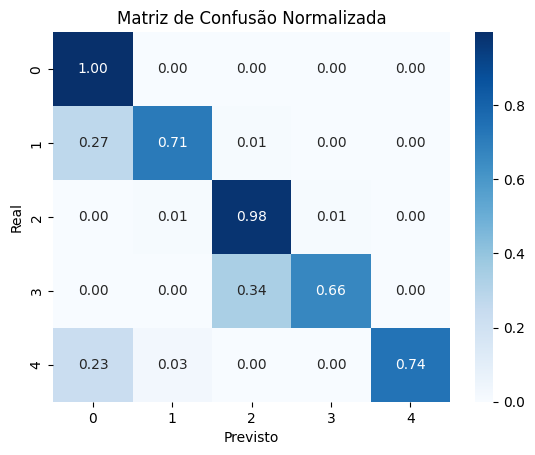

In [ ]:
# separar as características e o target
X = data_RFE.drop('cons_preco', axis=1)
y = data_RFE['cons_preco']

# dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# calcular os pesos de classe
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# criar um dicionário que mapeia cada classe ao seu peso correspondente
class_weight_dict = dict(enumerate(class_weights))

# instanciar o modelo com os pesos de classe ajustados
model = RandomForestClassifier(n_estimators=100, max_depth=30, min_samples_leaf=1, min_samples_split=5, class_weight=class_weight_dict, random_state=42)

# treinar o modelo
model.fit(X_train, y_train)

# fazer as previsões com o modelo treinado
y_pred = model.predict(X_test)

# avaliar o modelo
print(classification_report(y_test, y_pred))
average = 'micro'

accuracy, kappa, f1, confMatrix = predict_and_evaluate(X_test, y_test, model, average)

***Classweight (Sem RFECV)***

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     17257
         1.0       0.93      0.63      0.75      1327
         2.0       0.91      0.98      0.94       698
         3.0       0.88      0.68      0.77       146
         4.0       0.95      0.55      0.69       251

    accuracy                           0.96     19679
   macro avg       0.93      0.77      0.83     19679
weighted avg       0.96      0.96      0.96     19679

Acurácia:  0.963361959449159
Kappa:  0.8197892605565669
F1:  0.963361959449159
Precisão:  0.9298761370536418
Recall:  0.7660001956463772


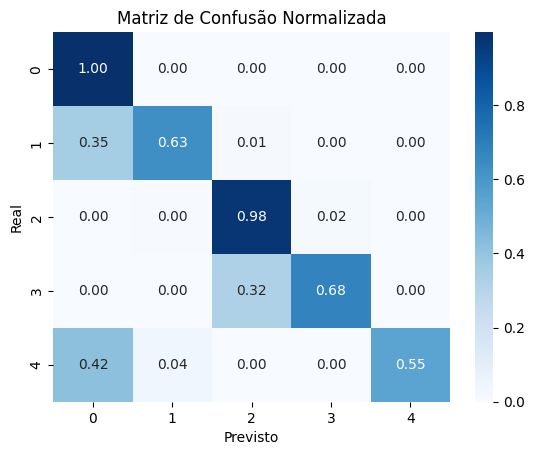

In [ ]:
# separar as características e o target
X = data_sem_missing.drop('cons_preco', axis=1)
y = data_sem_missing['cons_preco']

# dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# calcular os pesos de classe
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# criar um dicionário que mapeia cada classe ao seu peso correspondente
class_weight_dict = dict(enumerate(class_weights))

# instanciar o modelo com os pesos de classe ajustados
model = RandomForestClassifier(n_estimators=100, max_depth=30, min_samples_leaf=1, min_samples_split=5, class_weight=class_weight_dict, random_state=42)

# treinar o modelo
model.fit(X_train, y_train)

# fazer as previsões com o modelo treinado
y_pred = model.predict(X_test)

# avaliar o modelo
print(classification_report(y_test, y_pred))
average = 'micro'

accuracy, kappa, f1, confMatrix = predict_and_evaluate(X_test, y_test, model, average)

**Oversampling (RFECV)**

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     11503
         1.0       0.92      0.69      0.79       891
         2.0       0.92      0.98      0.95       461
         3.0       0.89      0.68      0.77        98
         4.0       0.96      0.65      0.78       167

    accuracy                           0.97     13120
   macro avg       0.93      0.80      0.86     13120
weighted avg       0.97      0.97      0.97     13120

Acurácia:  0.9676067073170732
Kappa:  0.8447892946477887
F1:  0.9676067073170732
Precisão:  0.9324679775823149
Recall:  0.8011507139311164


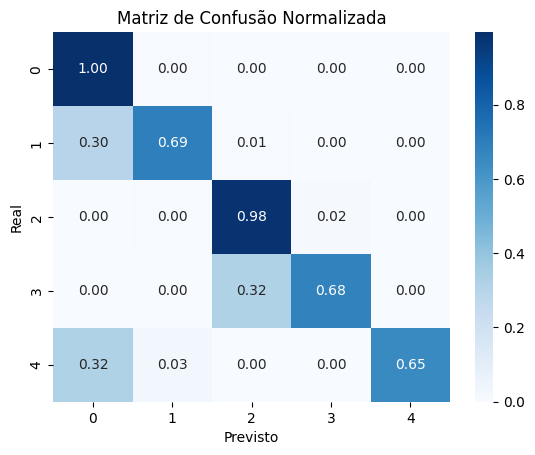

In [ ]:
# separar as características e o target
X = data_sem_missing.drop('cons_preco', axis=1)
y = data_sem_missing['cons_preco']

# dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# aplicar oversampling na classe minoritária
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# instanciar o modelo
model = RandomForestClassifier(n_estimators=100, max_depth=30, min_samples_leaf=1, min_samples_split=5,random_state=42)

# treinar o modelo com o conjunto de treinamento balanceado
model.fit(X_train_resampled, y_train_resampled)

# fazer as previsões com o modelo treinado
y_pred = model.predict(X_test)

# avaliar o modelo
print(classification_report(y_test, y_pred))
average = 'micro'

accuracy, kappa, f1, confMatrix = predict_and_evaluate(X_test, y_test, model, average)


## Modelagem com SVM

**RFECV (Sem balanceamento)**

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94     11503
         1.0       0.46      0.06      0.10       891
         2.0       0.79      0.17      0.28       461
         3.0       1.00      0.01      0.02        98
         4.0       1.00      0.01      0.01       167

    accuracy                           0.89     13120
   macro avg       0.83      0.25      0.27     13120
weighted avg       0.86      0.89      0.84     13120

Acurácia:  0.8858231707317074
Kappa:  0.1624577745335557
F1:  0.8858231707317074
Precisão:  0.8277558958321041
Recall:  0.2476935379001693


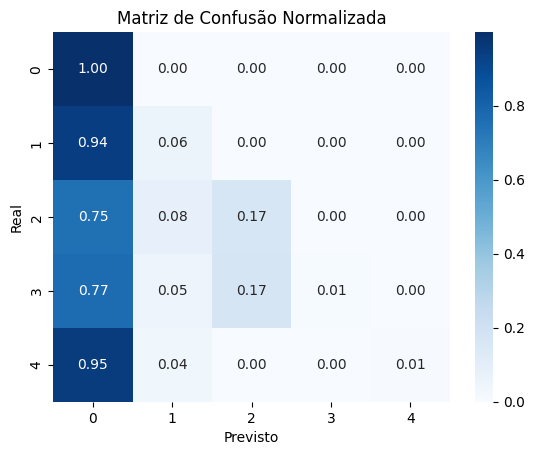

In [ ]:


# separar as características e o target
X = data_RFE.drop('cons_preco', axis=1)
y = data_RFE['cons_preco']

# dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# instanciar o modelo sem balanceamento
model = svm.SVC(C=2.9279757672456204, gamma='scale', kernel='linear',random_state=42)

# treinar o modelo
model.fit(X_train_scaled, y_train)

# fazer as previsões com o modelo treinado
y_pred = model.predict(X_test_scaled)

# avaliar o modelo
print(classification_report(y_test, y_pred))
average = 'micro'

accuracy, kappa, f1, confMatrix = predict_and_evaluate(X_test_scaled, y_test, model, average)


**RFECV + Classweight**

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94     11503
         1.0       0.29      0.16      0.21       891
         2.0       0.47      0.23      0.30       461
         3.0       0.15      0.38      0.21        98
         4.0       0.66      0.43      0.52       167

    accuracy                           0.87     13120
   macro avg       0.50      0.43      0.44     13120
weighted avg       0.85      0.87      0.86     13120

Acurácia:  0.8731707317073171
Kappa:  0.33786414139052157
F1:  0.437650685924416
Precisão:  0.49855384621864546
Recall:  0.4313899748527631


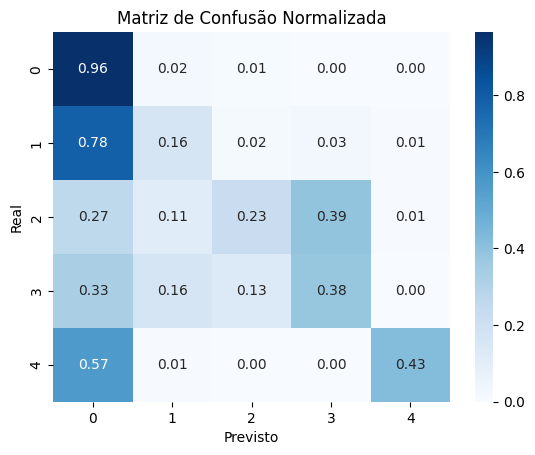

In [ ]:
# separar as características e o target
X = data_RFE.drop('cons_preco', axis=1)
y = data_RFE['cons_preco']

# dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# instanciar o modelo
model = svm.SVC(C=2.9279757672456204, gamma='scale', kernel='linear', class_weight='balanced',random_state=42)

# treinar o modelo
model.fit(X_train_scaled, y_train)

# fazer as previsões com o modelo treinado
y_pred = model.predict(X_test_scaled)

# avaliar o modelo
print(classification_report(y_test, y_pred))
average = 'macro'

accuracy, kappa, f1, confMatrix = predict_and_evaluate(X_test_scaled, y_test, model, average)



**RFECV + Oversampling**

In [ ]:


# separar as características e o target
X = data_RFE.drop('cons_preco', axis=1)
y = data_RFE['cons_preco']

# dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# aplicar a técnica de balanceamento RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

# instanciar o modelo
model = svm.SVC(C=2.9279757672456204, gamma='scale', kernel='linear', random_state=42)

# treinar o modelo
model.fit(X_ros, y_ros)

# fazer as previsões com o modelo treinado
y_pred = model.predict(X_test)

# avaliar o modelo
print(classification_report(y_test, y_pred))
average = 'macro'

accuracy, kappa, f1, confMatrix = predict_and_evaluate(X_test_scaled, y_test, model, average)

